This notebook explores the relationship between hydrothermal vents and fault zones to answer the question "do hydrothermal vents happen where earthquakes happen?"

In [1]:
import pandas as pd

Lets grab the hydrothermal vent location data from [Pangea](https://doi.pangaea.de/10.1594/PANGAEA.917894) and the [IntreRidge Vents Database Ver. 3.4](https://vents-data.interridge.org/ventfields_list_all).

In [8]:
dfile = '../data/hydrothermal_vent_fields_all.csv'

df = pd.read_csv(dfile)

df.head().T

,0,1,2,3,4
Name ID,13 N Ridge Site,94SO2,"AAR KR1, Mujin",AAR KR2,ABE
Name Alias(es),NaN,NaN,Misty Harbor,NaN,"Abe, plume 20, C-ELSC"
MGDS_FeatureID lowest in hierarchy,Mariana,NaN,SEIR,SEIR,ABE
Vent Sites,NaN,NaN,NaN,NaN,NaN
Activity,"active, confirmed","active, inferred","active, inferred","active, inferred","active, confirmed"
Maximum Temperature,33,NaN,NaN,NaN,309
Max Temperature Category,Low,NaN,NaN,NaN,NaN
Latitude,13.0987,-19.4,-62.1,-60,-20.7619
Longitude,143.689,169.9,158.8,152.5,-176.191
Ocean,N. Pacific,S. Pacific,Southern,Southern,S. Pacific


Lets get the fault zone location information from [GEM Global Active Faults Database (GEM GAF-DB)](https://github.com/GEMScienceTools/gem-global-active-faults)

In [13]:
import geopandas as gpd

url = 'https://github.com/GEMScienceTools/gem-global-active-faults/raw/master/geojson/gem_active_faults_harmonized.geojson'

gdf = gpd.read_file(url)

Now lets plot them together.

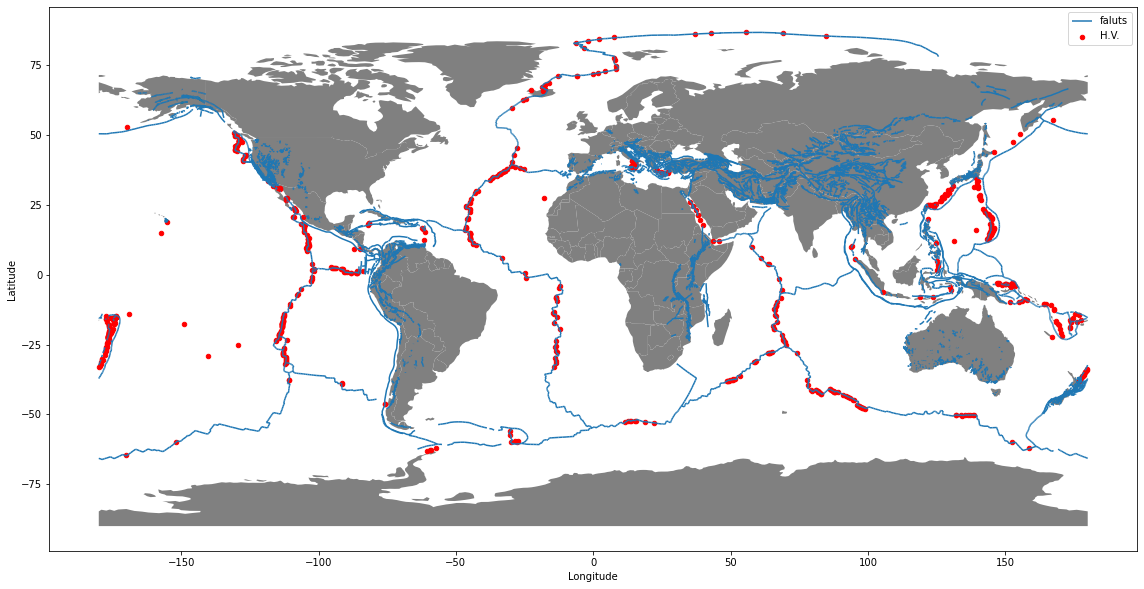

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

path = gpd.datasets.get_path('naturalearth_lowres')
dfglob = gpd.read_file(path)
# Add a column we'll use later
dfglob['gdp_pp'] = dfglob['gdp_md_est'] / dfglob['pop_est']

ax = dfglob.plot(color='grey')

gdf.plot(ax=ax)

df.plot.scatter(ax=ax, x='Longitude', y='Latitude',color='red')

plt.legend(['faluts','H.V.'])